<a href="https://colab.research.google.com/github/someshsb1/cs666student/blob/main/Som_CS666_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

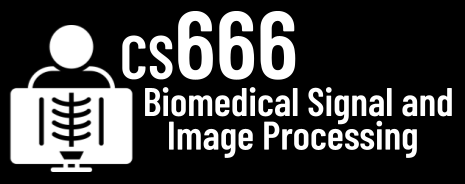
#Assignment 2

In [ ]:
#Name is: Somesh Balani

In [ ]:
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
# we will be using the EEG/MEG analysis library MNE
# documentation is available here: https://mne.tools/stable/index.html
!pip install -U mne

In [ ]:
import mne # let's import MNE

# .. and the sample dataset
from mne.datasets import sample

# These data were acquired with the Neuromag Vectorview system at
# MGH/HMS/MIT Athinoula A. Martinos Center Biomedical Imaging.
# EEG data from an electrode cap was acquired simultaneously with the MEG.

### EXPERIMENT DESCRIPTION ###
# In this experiment, checkerboard patterns were presented to the subject into
# the left and right visual field, interspersed by tones to the left or right ear.
# The interval between the stimuli was 750 ms. Occasionally a smiley face was
# presented at the center of the visual field. The subject was asked to press a
# key with the right index finger as soon as possible after the appearance of the face.

In [ ]:
# and let's load it!
data_path = sample.data_path()
raw = mne.io.read_raw_fif(os.path.join(data_path,'MEG/sample/sample_audvis_raw.fif'))

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


**Task 1:** Analyze the data. [20 Points]


In [ ]:
# How many EEG channels were used when acquiring the data?
# Hint: You can use raw.info or raw.ch_names to figure this out!

eeg_channels = [ch_name for ch_name in raw.ch_names if ch_name.startswith('EEG')]
print('There are ' + str(len(eeg_channels)) + ' EEG Channels in the acquired data.')

There are 60 EEG Channels in the acquired data.


In [ ]:
# TODO What is the sampling frequency of this data?

print('The sampling frequency of the data is: {:.2f}' .format(raw.info['sfreq']) + ' Hz')

The sampling frequency of the data is: 600.61 Hz


In [ ]:
# TODO What is the total duration of the measurement?
print("Total duration of the measurement in seconds: {:2f}" .format(raw.times[-1]))

Total duration of the measurement in seconds: 277.713681


**Task 2:** Let's look at some channels! [20 Points]

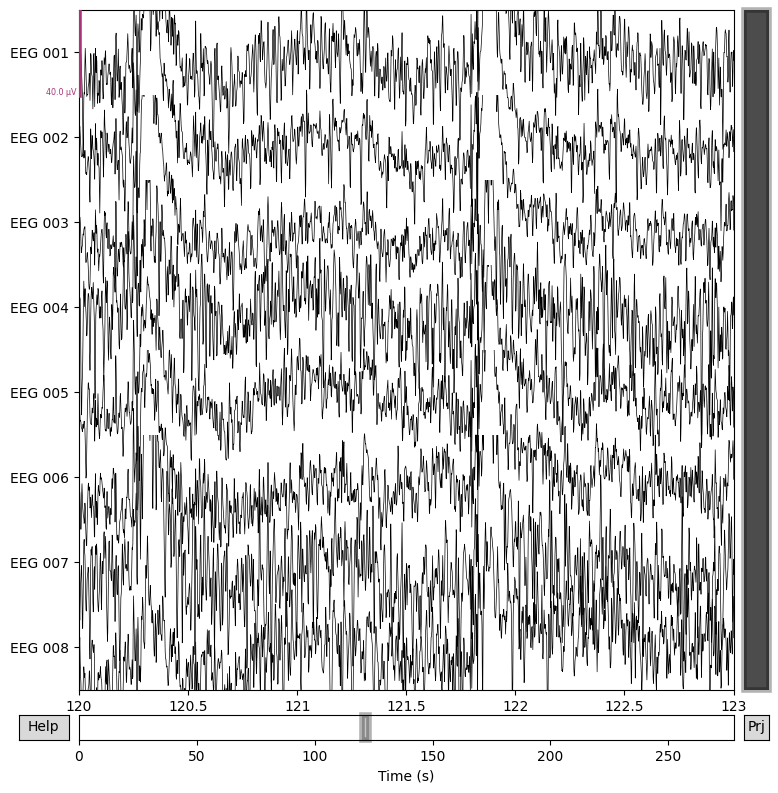

In [ ]:
# the code below plots EEG channels 1-8 for 3 seconds after 2 minutes
chs = ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg1to8 = raw.plot(order=chan_idxs, start=120, duration=3)

In [ ]:
# TODO please plot EEG channels 50-60 for 1 second after 151 seconds.

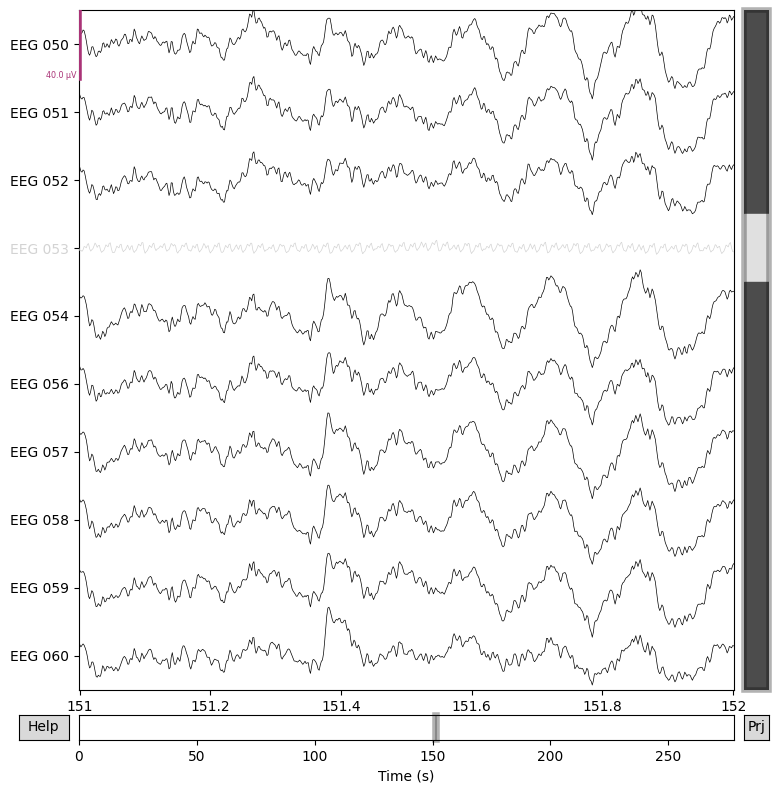

In [ ]:
# plotting EEG channels 50-60 for 1 second after 151 seconds.
chs = ['EEG 050', 'EEG 051', 'EEG 052', 'EEG 053', 'EEG 054', 'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg50to60 = raw.plot(order=chan_idxs, start=151, duration=1)

In [ ]:
# TODO: Do you see a bad channel? If yes, which one?
## Yes there's a bad channel in the above plot i.e., 'EEG 053'.

In [ ]:
# TODO: Please calculate the maximum value of the bad channel and compare it
# against a good channel. How would you detect a bad channel programmatically?
# Hint: See https://mne.tools/dev/generated/mne.io.Raw.html#mne.io.Raw to access
#       individual channels

In [ ]:

good_ch_name = 'EEG 060'
bad_ch_name = 'EEG 053'

# extract values for good and bad channels
good_ch_data, _ = raw[good_ch_name]
bad_ch_data, _ = raw[bad_ch_name]

# calculate maximum values
maxvalue_good_ch = good_ch_data.max()
maxvalue_bad_ch = bad_ch_data.max()

print("Bad EEG Channel", maxvalue_bad_ch)
print("Good EEG Channel", maxvalue_good_ch)

# compare the maximum values
if maxvalue_bad_ch > maxvalue_good_ch:
    print(f"The maximum value of the bad channel ({maxvalue_bad_ch}) is higher.")
else:
    print(f"The maximum value of the good channel ({maxvalue_good_ch}) is higher.")

Bad EEG Channel 6.10056150396332e-05
Good EEG Channel 0.00018301636099948837
The maximum value of the good channel (0.00018301636099948837) is higher.


**Task 3:** How long between event and brain activity? [25 Points]

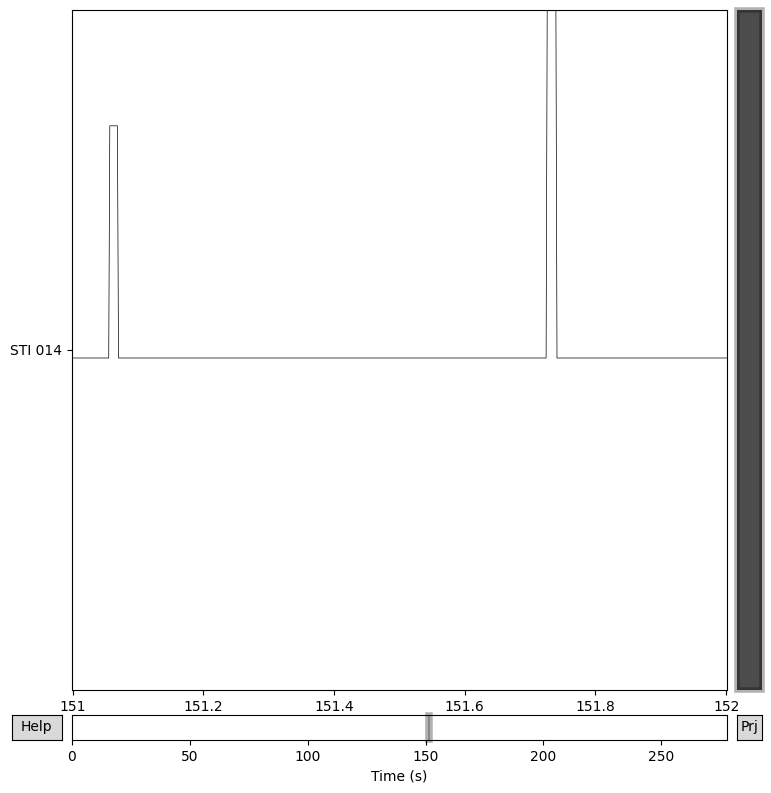

In [ ]:
# the following code plots the stimulus channel for the same time
chan_idxs = [raw.ch_names.index('STI 014')]
stim = raw.plot(order=chan_idxs, start=151, duration=1)

In [ ]:
# TODO Please combine the last two plots into one.
# the plot should show EEG channels 50-60 and the stimulus channel together.

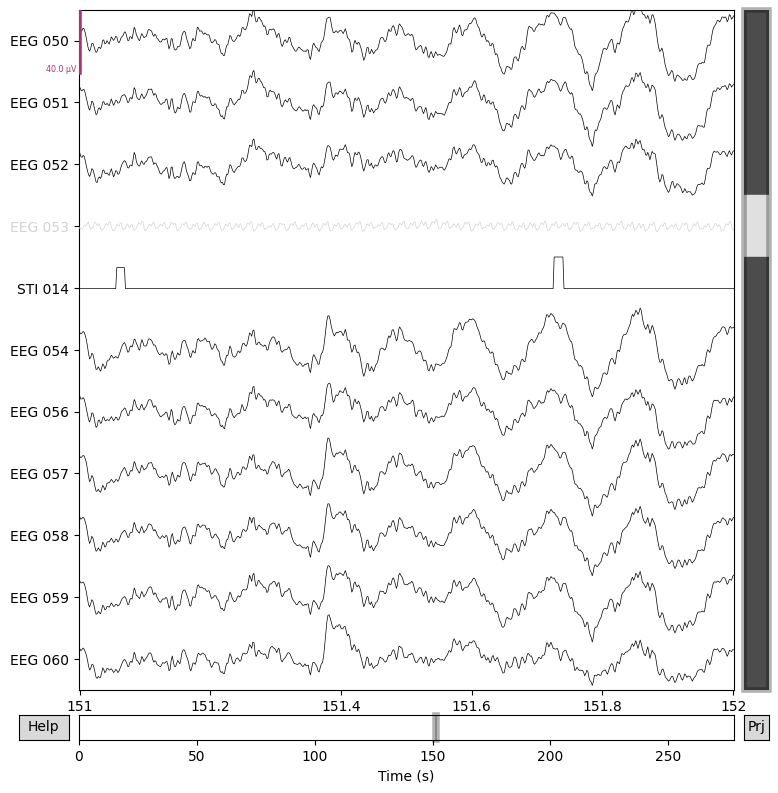

In [ ]:
## the plot shows EEG channels 50-60 and the stimulus channel together.
chs = ['EEG 050', 'EEG 051', 'EEG 052', 'EEG 053', 'STI 014', 'EEG 054', 'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg50to60STI014 = raw.plot(order=chan_idxs, start=151, duration=1)

In [ ]:
# TODO How many stimulus events do you observe?

In [ ]:
## I observe 2 stimulus events, one right around 151.05 ms and second happens around 151.75 ms

In [ ]:
# TODO Please estimate the time between the first stimulus and brain activity response.

In [ ]:
timestamp_first_stimulus = 151.05
timestamp_first_brain_activity = 151.4

time_diff = timestamp_first_brain_activity - timestamp_first_stimulus

print("Time between first stimulus and first brain activity: ~{:.2f}" .format(time_diff), "seconds")

Time between first stimulus and first brain activity: ~0.35 seconds


**Task 4:** Localize different brain waves for different stimuli! [35 Points]

In [ ]:
# the following code groups all stimuli together
# and allows the visualization of average brain activity per stimuli.
events = mne.find_events(raw, stim_channel='STI 014')
event_dict = {'auditory/left': 1,
              'auditory/right': 2,
              'visual/left': 3,
              'visual/right': 4,
              'face': 5,
              'button': 32}

picks = mne.pick_types(raw.info, eeg=True)

epochs = mne.Epochs(raw, events, event_id=event_dict, picks=picks,
                    preload=True)

320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
3 projection items activated
Loading data for 320 events and 421 original time points ...
0 bad epochs dropped


NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


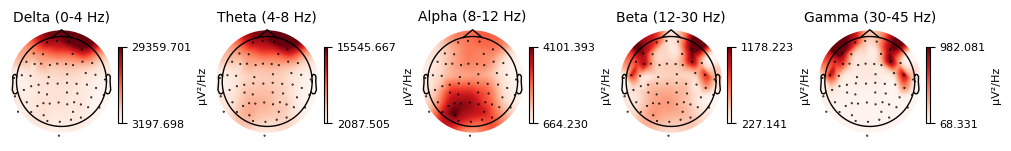

In [ ]:
# here we see the average localized brain activity for the right visual stimuli
visual_activity = epochs['visual/right'].plot_psd_topomap()

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


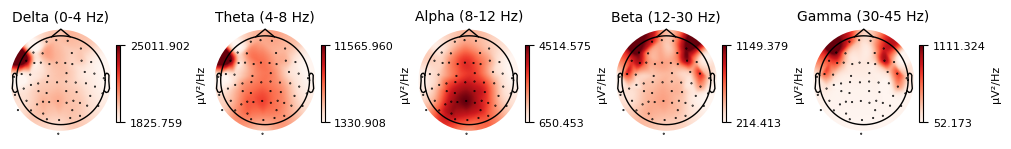

In [ ]:
# here we see the average localized brain activity for the shown 'face'
face_activity = epochs['face'].plot_psd_topomap()

In [ ]:
# TODO Please visualize the average brain activity when the subject pushes the button

    Using multitaper spectrum estimation with 7 DPSS windows


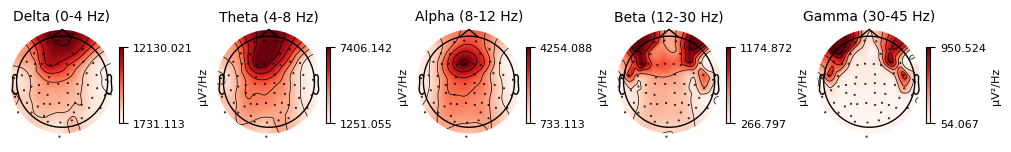

In [ ]:
# here we see the average localized brain activity when the subject pushes the button
btn_activity = epochs['button'].compute_psd().plot_topomap()

In [ ]:
# TODO Which difference do you see between the visual/right, the face, and the button event?
# TODO Which brain region seems active during the button event?
# Hint: visual/right and face seem more similar to the button event. Think about why?


In [ ]:
## The 'visual/right' and 'face' events, while involving different types of stimuli (visual vs. facial), both involve sensory perception and processing.
## The 'button' event, although a motor response, is closely linked to stimulus presentation and 'likely' occurs in response to a visual or facial stimulus.

## primary moter cortex / supplementary motor area of the brain region are active during the button event.

**Bonus Task:** What type of event happened in Task 3? [33 Points]

In [ ]:
# TODO Please go back to Task 3. Can you figure out which event types happened?

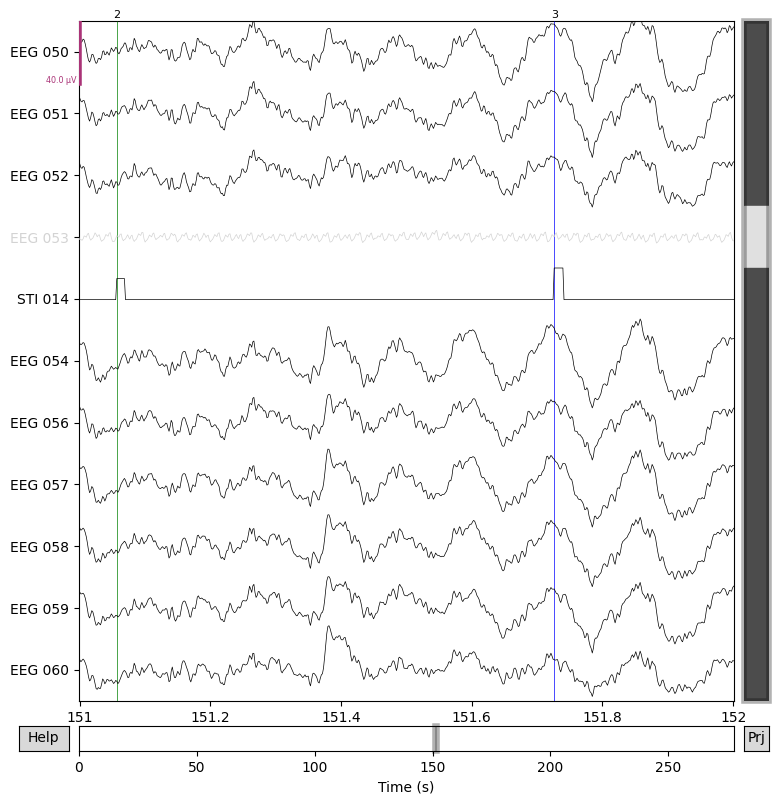

In [ ]:
#Plotting types of events
event_color={1: "r", 2: "g", 3: "b", 4: "m", 5: "y", 32: "k"}
chan_idxs_activity = raw.plot(order = chan_idxs, start = 151, duration = 1, events = events, event_color = event_color)

## The events type 2: "g" and 3: "b" happened based on the below plot, i.e., 'auditory/right': 2 & 'visual/left': 3

In [ ]:
# You did it!!
#
# ┈┈┈┈┈┈▕▔╲
# ┈┈┈┈┈┈┈▏▕
# ┈┈┈┈┈┈┈▏▕▂▂▂
# ▂▂▂▂▂▂╱┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▔▔▔▔▔▔╲▂▕▂▂|
#